In [9]:
import pandas as pd
df = pd.read_excel('../data/house_price_regression.xlsx', index_col=0)
df.head()

,url,title,age,area,floor_info,direction,layout,price
0,http://esf.sh.fang.com/chushou/3_289079207.htm,"新出笋盘,业主急售,低于市场价30万,精装南北通,近11/12号线",建筑年代：1998\r\n,65,中层(共6层)\r\n,南北向\r\n,\r\n 2室1厅\r\n ...,3500000
1,http://esf.sh.fang.com/chushou/3_290295785.htm,"业主急抛,低于市场价50万,双南双天井,闹中取静,近3/12号线!",建筑年代：1996\r\n,90,低层(共6层)\r\n,南北向\r\n,\r\n 3室2厅\r\n ...,5000000
2,http://esf.sh.fang.com/chushou/3_290971789.htm,新出笋盘 近11号线 东边套 低于市价50万 送20平米花园 急售,建筑年代：1998\r\n,72,低层(共6层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,3980000
3,http://esf.sh.fang.com/chushou/3_290987582.htm,"业主出国急售:板式两房,精装修全明,带产权车位,看房方便!",建筑年代：2006\r\n,96,高层(共7层)\r\n,南北向\r\n,\r\n 2室2厅\r\n ...,5500000
4,http://esf.sh.fang.com/chushou/3_291070232.htm,"徐汇滨江板块,双南两居,小高层带电梯,使用面积大,近3,11号线",建筑年代：1996\r\n,86,中层(共7层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,4500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 2791
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         2792 non-null   object
 1   title       2792 non-null   object
 2   age         2792 non-null   object
 3   area        2792 non-null   int64 
 4   floor_info  2792 non-null   object
 5   direction   2792 non-null   object
 6   layout      2792 non-null   object
 7   price       2792 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 196.3+ KB


In [11]:
df['age'] = df['age'].map(lambda e: 2020 - int(e.strip().strip('建筑年代：')))
df[['room','living_room']] = df['layout'].str.extract('(\d)室(\d)厅')
df['roome'] = df['room'].astype(int)
df['living_room'] = df['living_room'].astype(int)

ValueError: cannot convert float NaN to integer

In [23]:
df.head()

,url,title,age,area,direction,price,living_room,roome,total_floor,floor
0,http://esf.sh.fang.com/chushou/3_289079207.htm,"新出笋盘,业主急售,低于市场价30万,精装南北通,近11/12号线",22,65,南北向,3500000,1,2,6,中
1,http://esf.sh.fang.com/chushou/3_290295785.htm,"业主急抛,低于市场价50万,双南双天井,闹中取静,近3/12号线!",24,90,南北向,5000000,2,3,6,低
2,http://esf.sh.fang.com/chushou/3_290971789.htm,新出笋盘 近11号线 东边套 低于市价50万 送20平米花园 急售,22,72,南向,3980000,1,2,6,低
3,http://esf.sh.fang.com/chushou/3_290987582.htm,"业主出国急售:板式两房,精装修全明,带产权车位,看房方便!",14,96,南北向,5500000,2,2,7,高
4,http://esf.sh.fang.com/chushou/3_291070232.htm,"徐汇滨江板块,双南两居,小高层带电梯,使用面积大,近3,11号线",24,86,南向,4500000,1,2,7,中


In [19]:
df['direction'] = df['direction'].map(lambda e:e.strip())

In [20]:
df['total_floor'] = df['floor_info'].str.extract('共(\d)层')
df['floor'] = df['floor_info'].str.extract('^(.)层')

In [22]:
del df['floor_info']

In [25]:
del df['title']

In [26]:
del df['url']

In [27]:
df.head()

,age,area,direction,price,living_room,roome,total_floor,floor
0,22,65,南北向,3500000,1,2,6,中
1,24,90,南北向,5000000,2,3,6,低
2,22,72,南向,3980000,1,2,6,低
3,14,96,南北向,5500000,2,2,7,高
4,24,86,南向,4500000,1,2,7,中


In [28]:
df = pd.concat([df, pd.get_dummies(df['direction']), pd.get_dummies(df['floor'])], axis=1)

In [30]:
del df['南北向']
del df['低']
del df['direction']
del df['floor']

In [31]:
df.head()

,age,area,price,living_room,roome,total_floor,东南向,东向,南向,西南向,西向,中,高
0,22,65,3500000,1,2,6,0,0,0,0,0,1,0
1,24,90,5000000,2,3,6,0,0,0,0,0,0,0
2,22,72,3980000,1,2,6,0,0,1,0,0,0,0
3,14,96,5500000,2,2,7,0,0,0,0,0,0,1
4,24,86,4500000,1,2,7,0,0,1,0,0,1,0


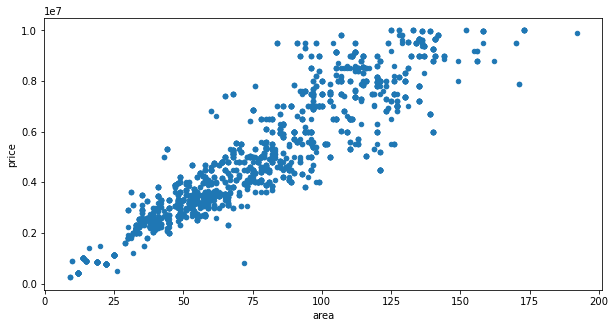

In [33]:
df[['price', 'area']].plot(kind='scatter', x='area', y='price', figsize=[10,5])

In [37]:
y = df['price']
X = df[['area']]

In [38]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
import matplotlib.pyplot as plt

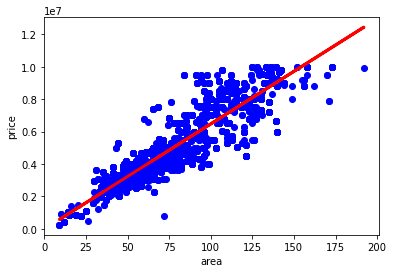

In [40]:
plt.scatter(X, y, color='blue')
plt.plot(X, regr.predict(X), linewidth=3, color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [55]:
y = df['price'].values
X = df[['age', 'area', 'room', 'living_room','东南向', '东向', '南向', '西南向', '西向', '中', '高']]

In [56]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
import statsmodels.api as sm

In [59]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1413.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:51:24   Log-Likelihood:                -42341.
No. Observations:                2792   AIC:                         8.471e+04
Df Residuals:                    2780   BIC:                         8.478e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.663e+05   1.07e+05      1.548      